In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

In [2]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import AllKNN
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [3]:
data = pd.read_csv('wine2.csv')
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.Wine.value_counts()

2    71
1    59
3    22
Name: Wine, dtype: int64

In [5]:
y = data.Wine
del data['Wine']
X = data

## 아무 전처리 안하고 바로 성능찍어본다

In [6]:
from sklearn.model_selection import train_test_split

X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [7]:
'''train set 의 label분포'''
print(Counter(y_tr))
print(np.array(list(Counter(y_tr).values())) / len(y_tr))


Counter({2: 58, 1: 43, 3: 20})
[0.16528926 0.3553719  0.47933884]


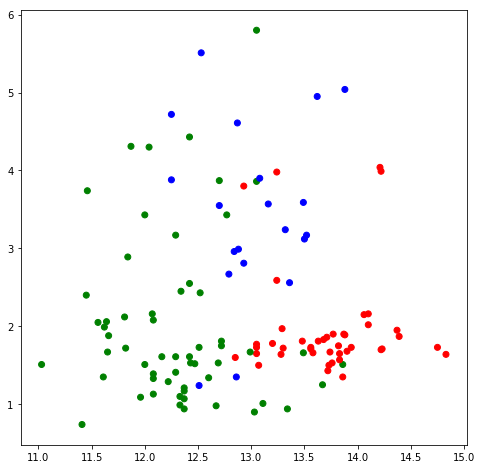

In [8]:
colors = ['red', 'green', 'blue']

fig = plt.figure(figsize = (8,8))
plt.scatter(X_tr['Alcohol'], X_tr['Malic.acid'], c=y_tr, cmap = matplotlib.colors.ListedColormap(colors))

plt.show()

In [9]:
'''test set 의 label분포'''
print(Counter(y_test))
print(np.array(list(Counter(y_test).values())) / len(y_test))


Counter({1: 16, 2: 13, 3: 2})
[0.51612903 0.06451613 0.41935484]


In [10]:
lr = LogisticRegression()
lr.fit(X_tr, y_tr)
y_pred = lr.predict(X_test)
print("Accurancy :", accuracy_score(y_test, y_pred))
#print(classification_report(y_test, y_pred))

Accurancy : 0.9032258064516129


## class = 3 이  적인 imbalance data -> class 3을 좀 많이 뽑자 -> over sampling

### oversampling 전 label 비율

In [11]:
'''train set 의 label분포'''
print(Counter(y_tr))
print(np.array(list(Counter(y_tr).values())) / len(y_tr))


Counter({2: 58, 1: 43, 3: 20})
[0.16528926 0.3553719  0.47933884]


### random 방법으로 oversampling

In [12]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_tr, y_tr)

In [13]:
print(Counter(y_resampled))
print(np.array(list(Counter(y_resampled).values())) / len(y_resampled))

Counter({3: 58, 1: 58, 2: 58})
[0.33333333 0.33333333 0.33333333]


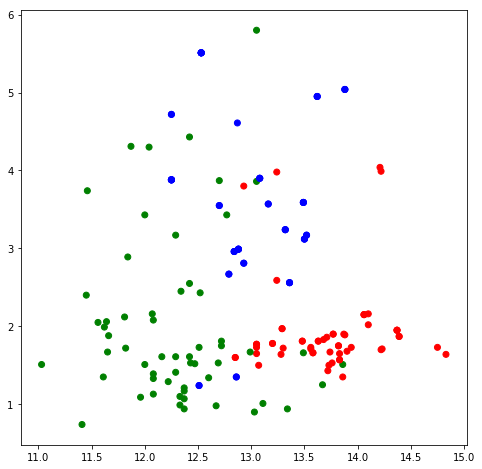

In [14]:
colors = ['red', 'green', 'blue']

fig = plt.figure(figsize = (8,8))
plt.scatter(X_resampled[:,0],  X_resampled[:,1], c =y_resampled,
           cmap = matplotlib.colors.ListedColormap(colors))

plt.show()

### 딱히 큰 변화는 없는듯 하다

In [15]:
'''random 방법의 oversampling'''
lr = LogisticRegression()
lr.fit(X_resampled, y_resampled)
y_pred = lr.predict(X_test)
print("Accurancy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["0", "1", '2']))

Accurancy : 0.9032258064516129
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.86      0.92      0.89        13
           2       0.67      1.00      0.80         2

   micro avg       0.90      0.90      0.90        31
   macro avg       0.84      0.93      0.87        31
weighted avg       0.92      0.90      0.91        31



In [16]:
'''oversampling없이 한 모델'''
lr = LogisticRegression()
lr.fit(X_tr, y_tr)
y_pred = lr.predict(X_test)
print("Accurancy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["0", "1", '2']))

Accurancy : 0.9032258064516129
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.86      0.92      0.89        13
           2       0.67      1.00      0.80         2

   micro avg       0.90      0.90      0.90        31
   macro avg       0.84      0.93      0.87        31
weighted avg       0.92      0.90      0.91        31



# Over Sampling with SMOTE

In [17]:
from imblearn.over_sampling import SMOTE

### oversampling 전 label 비율

In [18]:
'''train set 의 label분포'''
print(Counter(y_tr))
print(np.array(list(Counter(y_tr).values())) / len(y_tr))


Counter({2: 58, 1: 43, 3: 20})
[0.16528926 0.3553719  0.47933884]


### SMOTE 후

In [19]:
smothe = SMOTE()
X_resampled, y_resampled = smothe.fit_sample(X_tr, y_tr)

In [20]:

print(Counter(y_resampled))
print(np.array(list(Counter(y_resampled).values())) / len(y_resampled))


Counter({3: 58, 1: 58, 2: 58})
[0.33333333 0.33333333 0.33333333]


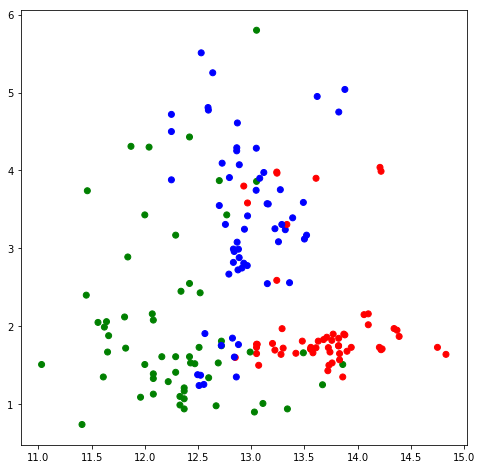

In [21]:
colors = ['red', 'green', 'blue']

fig = plt.figure(figsize = (8,8))
plt.scatter(X_resampled[:,0],  X_resampled[:,1], c =y_resampled,
           cmap = matplotlib.colors.ListedColormap(colors))

plt.show()

In [22]:
lr = LogisticRegression()
lr.fit(X_resampled, y_resampled)
y_pred = lr.predict(X_test)
print("Accurancy :", accuracy_score(y_test, y_pred))
#print(classification_report(y_test, y_pred, target_names=["0", "1", '2']))

Accurancy : 0.9032258064516129


In [23]:
lr = LogisticRegression()
lr.fit(X_tr, y_tr)
y_pred = lr.predict(X_test)
print("Accurancy :", accuracy_score(y_test, y_pred))
#print(classification_report(y_test, y_pred, target_names=["0", "1", '2']))

Accurancy : 0.9032258064516129


# Under Sampling with InstanceHardnessThreshold

In [24]:
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.ensemble import RandomForestClassifier

### oversampling 전 label 비율

In [25]:
'''train set 의 label분포'''
print(Counter(y_tr))
print(np.array(list(Counter(y_tr).values())) / len(y_tr))


Counter({2: 58, 1: 43, 3: 20})
[0.16528926 0.3553719  0.47933884]


### InstanceHardnessThreshold 후

In [31]:
rus = InstanceHardnessThreshold(RandomForestClassifier())
X_resampled, y_resampled = rus.fit_sample(X_tr, y_tr)

In [32]:

print(Counter(y_resampled))
print(np.array(list(Counter(y_resampled).values())) / len(y_resampled))


Counter({2: 24, 1: 21, 3: 20})
[0.32307692 0.36923077 0.30769231]


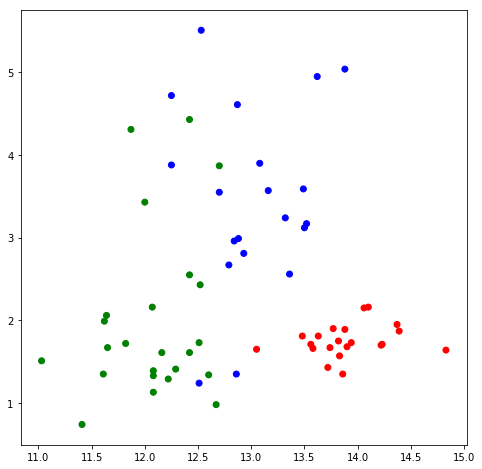

In [33]:
colors = ['red', 'green', 'blue']

fig = plt.figure(figsize = (8,8))
plt.scatter(X_resampled[:,0],  X_resampled[:,1], c =y_resampled,
           cmap = matplotlib.colors.ListedColormap(colors))

plt.show()

In [34]:
lr = LogisticRegression()
lr.fit(X_resampled, y_resampled)
y_pred = lr.predict(X_test)
print("Accurancy :", accuracy_score(y_test, y_pred))
#print(classification_report(y_test, y_pred, target_names=["0", "1", '2']))

Accurancy : 0.9354838709677419


In [35]:
lr = LogisticRegression()
lr.fit(X_tr, y_tr)
y_pred = lr.predict(X_test)
print("Accurancy :", accuracy_score(y_test, y_pred))
#print(classification_report(y_test, y_pred, target_names=["0", "1", '2']))

Accurancy : 0.9032258064516129


### 결과

- sampling 없이 lr model - 9032
- oversampling with random - 0.9032
- oversampling with smoth - 0.9032
- undersampling with InstanceHardnessThreshold - 0.9354
